# **Experiments 3**



## The steps are:
1.   Load and explore dataset
2.   Data preparation: Feature selection(Gender,Age_brand) + Feature engineering(One hot encoding + trasforming)
3.   Split data
4.   Scale data
5.   Assess Baseline model
6.   Train Logistic Regression Classifier
7.   Train Logistic Regression Classifier with L1 and L2 Regularisation
8.   Build a KNN model using euclidean distance
9.   Train SVC with default hyperparamaters
10.  Train Decision tree with default hyperparamaters
11.  Assess model on Testing Set

## 1. Load and explore dataset

**[1.1]** Import packages

In [ ]:
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the CSV file and load the dataset into dataframe called df

In [ ]:
file_url = 'repurchase_training.csv'
df = pd.read_csv(file_url)

**[1.3]** Display the first 5 rows of df


In [ ]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


**[1.4]** Display the dimensions of df

In [ ]:
df.shape

(131337, 17)

**[1.5]** Display the summary of df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

Columns with missing data: **age_band and gender**

**[1.6]** Display the descriptive statictics of df


In [ ]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


There is no significant outliers in dataset.

## 2. Data preparation: Feature selection(Gender,Age_brand) + Feature engineering(One hot encoding + trasforming)

**[2.1]** Create a copy of the dataframe and remove duplicated rows

In [ ]:
df_cleaned = df.copy()
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
print(df_cleaned['car_model'].unique())

['model_1' 'model_2' 'model_3' 'model_5' 'model_6' 'model_4' 'model_7'
 'model_8' 'model_9' 'model_10' 'model_11' 'model_13' 'model_12'
 'model_14' 'model_15' 'model_16' 'model_17' 'model_18' 'model_19']


In [ ]:
print(df_cleaned['car_segment'].unique())

['LCV' 'Small/Medium' 'Large/SUV' 'Other']


**[2.2]** Looking at all records that are the same with model 19 except car segment.

In [ ]:
a=df_cleaned[df_cleaned['car_model']=='model_19']
b=a.drop('car_model', axis=1)
merged_df = pd.merge(df_cleaned, b, on=['Target', 'age_band', 'gender', 'age_of_vehicle_years',
       'sched_serv_warr', 'non_sched_serv_warr', 'sched_serv_paid',
       'non_sched_serv_paid', 'total_paid_services', 'total_services',
       'mth_since_last_serv', 'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased'])
merged_df

,ID_x,Target,age_band,gender,car_model,car_segment_x,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,ID_y,car_segment_y
0,3529,0,NaN,Male,model_3,Large/SUV,9,1,1,1,3,2,1,1,1,1,1,100546,Other
1,81547,0,NaN,Male,model_5,Large/SUV,9,1,1,1,3,2,1,1,1,1,1,100546,Other
2,100546,0,NaN,Male,model_19,Other,9,1,1,1,3,2,1,1,1,1,1,100546,Other
3,30920,0,NaN,Male,model_19,Other,9,1,1,3,1,2,1,1,1,1,1,30920,Other
4,68275,0,NaN,Male,model_5,Large/SUV,9,1,1,3,1,2,1,1,1,1,1,30920,Other
5,92955,0,NaN,Male,model_1,LCV,9,1,1,3,1,2,1,1,1,1,1,30920,Other


Not only one model could match model 19, so it better to remove data with model 19

**[2.3]** Remove model_19

In [ ]:
df_cleaned=df_cleaned[df_cleaned['car_model']!='model_19']

**[2.4]** Find all car models with car segment is other.

In [ ]:
df_cleaned[df_cleaned['car_segment']=='Other']['car_model'].describe()

count           56
unique           1
top       model_17
freq            56
Name: car_model, dtype: object

**[2.5]** Find all car segment that belong to model 17.

In [ ]:
df_cleaned[df_cleaned['car_model']=='model_17']['car_segment'].describe()

count              153
unique               2
top       Small/Medium
freq                97
Name: car_segment, dtype: object

**[2.6]** Replacing other car segment to small and medium.

In [ ]:
df_cleaned['car_segment']=df_cleaned['car_segment'].replace('Other','Small/Medium')

<ipython-input-14-796ec3898f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['car_segment']=df_cleaned['car_segment'].replace('Other','Small/Medium')


**[2.7]** Transforming Age band to numeric

In [ ]:
df_cleaned['age_band'].unique()

array(['3. 35 to 44', nan, '1. <25', '4. 45 to 54', '2. 25 to 34',
       '7. 75+', '5. 55 to 64', '6. 65 to 74'], dtype=object)

In [ ]:
df_cleaned.dropna(subset=['age_band'], inplace=True)
df_cleaned['age_band']=df_cleaned['age_band'].replace({'1. <25':1,'2. 25 to 34':2,'3. 35 to 44':3,'4. 45 to 54':4,'5. 55 to 64':5,'6. 65 to 74':6,'7. 75+':7 })

<ipython-input-16-2c732ee10d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['age_band'], inplace=True)
<ipython-input-16-2c732ee10d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age_band']=df_cleaned['age_band'].replace({'1. <25':1,'2. 25 to 34':2,'3. 35 to 44':3,'4. 45 to 54':4,'5. 55 to 64':5,'6. 65 to 74':6,'7. 75+':7 })


**[2.8]** One hot encoding

In [ ]:
df_cleaned.dropna(subset=['gender'], inplace=True)

In [ ]:
Encoding= pd.get_dummies(df_cleaned['car_segment'])
df_cleaned = pd.concat([df_cleaned, Encoding], axis=1)
Encoding= pd.get_dummies(df_cleaned['gender'])
df_cleaned = pd.concat([df_cleaned, Encoding], axis=1)

**[2.9]** Drop non-numeric columns

In [ ]:
df_cleaned.drop(['age_band','gender','car_model','car_segment','ID'], axis=1,inplace=True)

**[2.10]** Remove all observation with missing values:

In [ ]:
df_cleaned.dropna(how='any', inplace=True)

## 3. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_cleaned.pop('Target')
X = df_cleaned
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)


## 4. Data scale

**[4.1]** Import StandardScaler from Sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

**[4.2]** Instantiate a StandardScaler and save it into a variable called `scaler`

In [ ]:
scaler = StandardScaler()

**[4.3]** Fit the scaler on the training set

In [ ]:
scaler.fit(X_train)

StandardScaler()

**[4.4]** Apply the scaler on the training set and display the result

In [ ]:
scaler.transform(X_train)

array([[-0.25751726, -1.28978059, -0.11547852, ..., -0.93493323,
         1.12397987, -1.12397987],
       [ 1.31866597, -0.54562143, -0.4762334 , ...,  1.0695951 ,
         1.12397987, -1.12397987],
       [ 0.79327156, -0.17354185, -1.55849805, ...,  1.0695951 ,
        -0.88969565,  0.88969565],
       ...,
       [-0.78291167, -0.54562143, -0.83698828, ...,  1.0695951 ,
        -0.88969565,  0.88969565],
       [ 0.26787715, -0.54562143, -0.11547852, ..., -0.93493323,
        -0.88969565,  0.88969565],
       [ 0.26787715, -0.17354185,  1.32754102, ...,  1.0695951 ,
         1.12397987, -1.12397987]])

**[4.5]** Replace the features values with the results of the scaler

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## 5. Assess Baseline Model

**[5.1]** Find the mode of the target variable and save it into a variable called y_mode

In [ ]:
y_mode = y.mode()

**[5.2]** Create a numpy array called y_base filled with this value of same length of y_train

In [ ]:
y_base = np.full(y_train.shape, y_mode)

**[5.3]** Import the f1 score from sklearn

In [ ]:
from sklearn.metrics import f1_score

**[5.4]** Display the f1 score of this baseline model using the training set

In [ ]:
f1_score(y_train, y_base)

0.0

## 6. Train a Logistic Regression Model

**[6.1]** Import the LogisticRegression class from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

**[6.2]** Instantiate our model default hyperparameter

In [ ]:
log_reg = LogisticRegression()

**[6.3]** Fit our model with the training data

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression()

**[6.4]** Print the f1 score of this model for the training set

In [ ]:
y_train_preds_log = log_reg.predict(X_train)
f1_score(y_train, y_train_preds_log)

0.3977900552486188

**[6.5]** Print the f1 score of this model for the validation set

In [ ]:
y_val_preds_log = log_reg.predict(X_val)
f1_score(y_val, y_val_preds_log)

0.4444444444444444

## 7. Train Logistic Regression Classifier with L1 and L2 Regularisation

**[7.1]** Instantiate a Logistic Regression with L1 and L2 regularisation

In [ ]:
log_elastic_reg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

**[7.2]** Fit our model with the training data

In [ ]:
log_elastic_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

**[7.3]** Display the f1 score for the training set

In [ ]:
y_train_preds_elastic = log_elastic_reg.predict(X_train)
f1_score(y_train, y_train_preds_elastic)

0.38888888888888895

**[7.4]** Display the f1 score for the validation set

In [ ]:
y_val_preds_elastic = log_elastic_reg.predict(X_val)
f1_score(y_val, y_val_preds_elastic)


0.4444444444444444

## 8. Build a KNN model using euclidian distance

**[8.1]** Import the KNeighborsClassifier class from sklearn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**[8.2]** Instantiate our model with metric:'euclidean'

In [ ]:
knn_euc_class = KNeighborsClassifier(metric='euclidean')

**[8.3]** Fit our model with the training data

In [ ]:
knn_euc_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

**[8.4]** Display the f1 score on the training set

In [ ]:
y_train_preds_knn_euc = knn_euc_class.predict(X_train)
f1_score(y_train, y_train_preds_knn_euc)

0.8497854077253219

**[8.5]** Display the f1 score on the validation set

In [ ]:
y_val_preds_knn_euc = knn_euc_class.predict(X_val)
f1_score(y_val, y_val_preds_knn_euc)

0.7169811320754716

**[8.6]** Display the confusion matrix on the training and validation sets

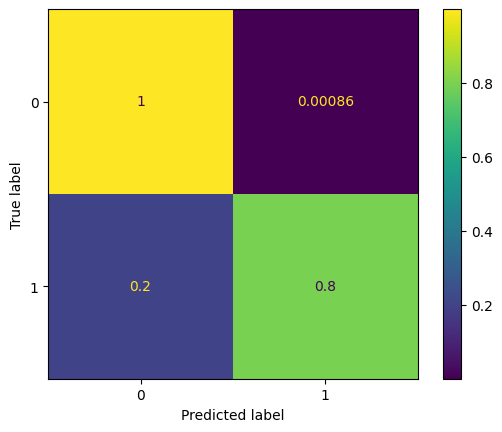

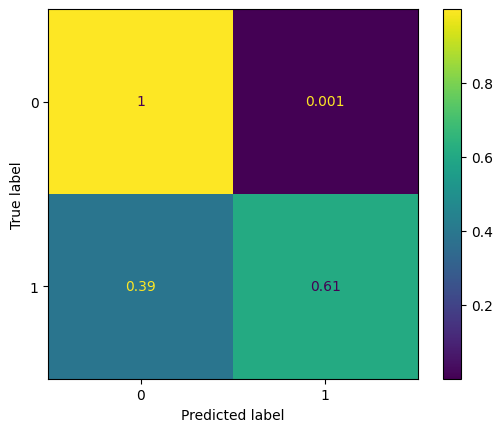

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(knn_euc_class, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(knn_euc_class, X_val, y_val, normalize='true')

## 9. Train SVC with Default Hyperparameters

**[9.1]** Import SVC from sklearn.svm

In [ ]:
from sklearn.svm import SVC

**[9.2]** Instantiate a SVC() model with default hyperparameters

In [ ]:
svc_1 = SVC(random_state=42)

**[9.3]** Train the model on the training set and save the predictions from the training and validation sets

In [ ]:
svc_1.fit(X_train_scaled, y_train)
y_train_preds = svc_1.predict(X_train_scaled)
y_val_preds = svc_1.predict(X_val_scaled)


**[9.4]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))

0.8471615720524017
0.6666666666666667


**[9.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

**[9.6]** Display the confusion matrix on the training and validation sets

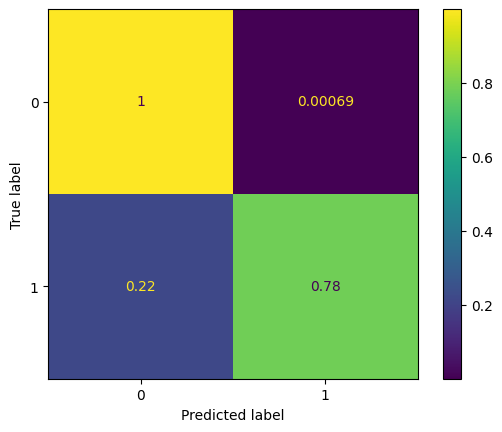

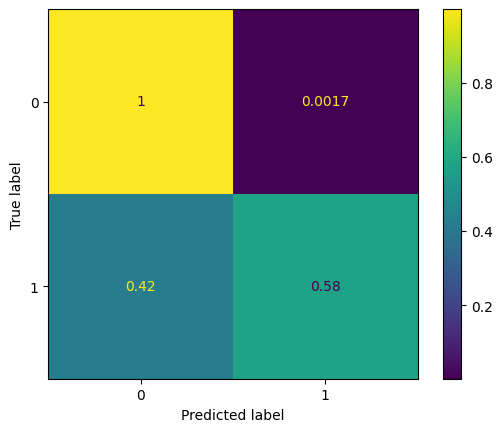

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_1, X_train_scaled, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc_1, X_val_scaled, y_val, normalize='true')

## 10. Train a Decision Tree with Default Hyperparameters

**[10.1]** Import DecisionTreeClassifier from sklearn.tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**[10.2]** Instantiate a DecisionTreeClassifier() model.

In [ ]:
tree_1 = DecisionTreeClassifier(random_state=42)

**[10.3]** Train the model on the training set and save the predictions from the training and validation sets



In [ ]:
tree_1.fit(X_train, y_train)
y_train_preds = tree_1.predict(X_train)
y_val_preds = tree_1.predict(X_val)

**[10.5]** Print the f1 score of the training and validation sets

In [ ]:
print(f1_score(y_train, y_train_preds))
print(f1_score(y_val, y_val_preds))


0.663316582914573
0.4285714285714286


**[10.6]** Print the confusion matrices for the training and validation sets for this model:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

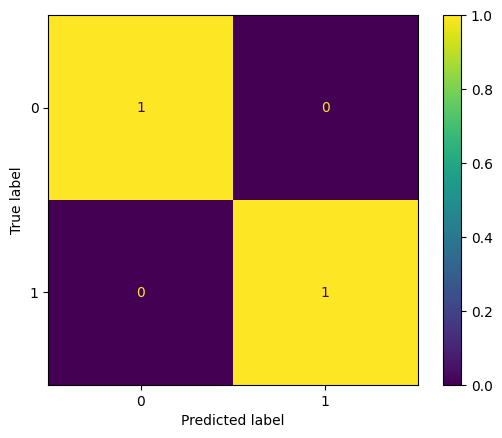

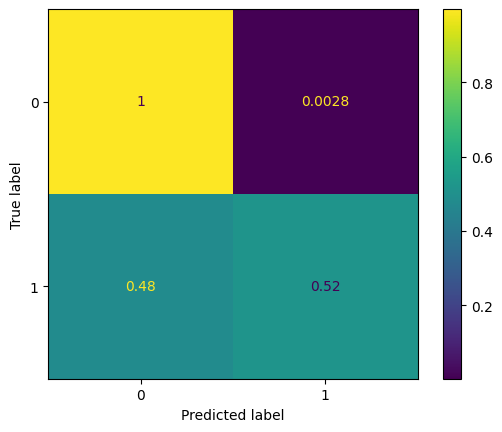

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_1, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(tree_1, X_val, y_val, normalize='true')

## 11. Assess model on Testing Set

**[11.1]** Print the F1 scores of our best model on the testing set

In [ ]:
y_test_preds_knn_euc = knn_euc_class.predict(X_test)
print(f1_score(y_test, y_test_preds_knn_euc))

0.8333333333333333


**[11.2]** Display the confusion matrix for our best model on all sets

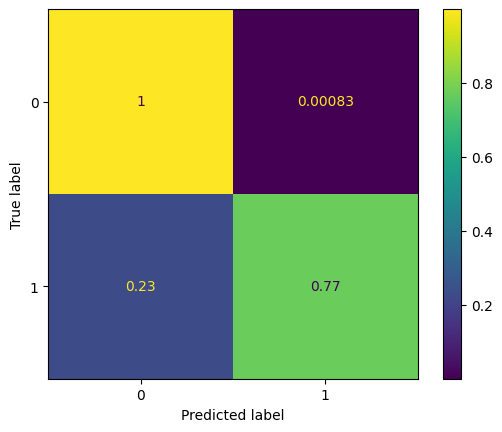

In [ ]:
ConfusionMatrixDisplay.from_estimator(knn_euc_class, X_test, y_test, normalize='true')